In [13]:
import os
import datetime
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tqdm import tqdm

# 1. Przygotowanie danych z czujnika

In [14]:
recording_list_files = os.listdir('sensor')
print(recording_list_files)

['2023-06-06T210952_data.txt', '2023-06-06T211233_data.txt', '2023-06-06T211334_data.txt', '2023-06-06T215232_data.txt', '2023-06-06T215249_data.txt', '2023-06-06T215350_data.txt', '2023-06-06T215451_data.txt', '2023-06-06T215552_data.txt', '2023-06-06T215653_data.txt', '2023-06-06T215754_data.txt', '2023-06-06T215855_data.txt', '2023-06-06T215957_data.txt', '2023-06-06T220058_data.txt', '2023-06-06T220159_data.txt', '2023-06-06T220300_data.txt', '2023-06-06T220401_data.txt', '2023-06-06T220518_data.txt', '2023-06-06T220619_data.txt', '2023-06-06T220720_data.txt', '2023-06-06T220821_data.txt', '2023-06-06T220922_data.txt', '2023-06-06T221023_data.txt', '2023-06-06T221124_data.txt', '2023-06-06T221226_data.txt', '2023-06-06T221327_data.txt', '2023-06-06T221428_data.txt', '2023-06-06T221529_data.txt', '2023-06-06T221630_data.txt', '2023-06-06T221731_data.txt', '2023-06-06T221832_data.txt', '2023-06-06T221933_data.txt', '2023-06-06T222034_data.txt', '2023-06-06T222135_data.txt', '2023-06-

In [15]:
recordings = []
for filename in recording_list_files:
    file_dir = os.path.join('sensor', filename)
    file = open(file_dir, 'r').read()
    file_split = file.split('\n')[:-1]
    for x in file_split:
        e = x.split(';')
        e[0] = float(e[0])
        e[1] = int(e[1])
        e[2] = int(e[2])
        # e[0] = datetime.datetime.fromtimestamp(e[0])
        recordings.append(e)

print(recordings[0:20])

[[1686085258.198788, 492381, 3], [1686085258.248448, 492431, 3], [1686085258.298442, 492481, 3], [1686085258.348444, 492531, 3], [1686085258.398446, 492581, 3], [1686085258.44844, 492631, 3], [1686085258.498446, 492681, 3], [1686085258.54844, 492731, 3], [1686085258.598442, 492781, 3], [1686085258.648444, 492831, 3], [1686085258.698442, 492881, 3], [1686085258.748444, 492931, 3], [1686085258.798442, 492981, 3], [1686085258.848444, 493031, 3], [1686085258.898442, 493081, 3], [1686085258.948444, 493131, 3], [1686085258.998442, 493181, 3], [1686085259.048444, 493231, 3], [1686085259.098443, 493281, 3], [1686085259.148442, 493331, 3]]


## 1.2 Odstępy czasowe pomiędzy próbkami

Dzięki temu możliwe jest odzielenie ich do 3 poszczególnych nagrań video

Id of new recordings: 3601
Id of new recordings: 28822
Id of new recordings: 55238


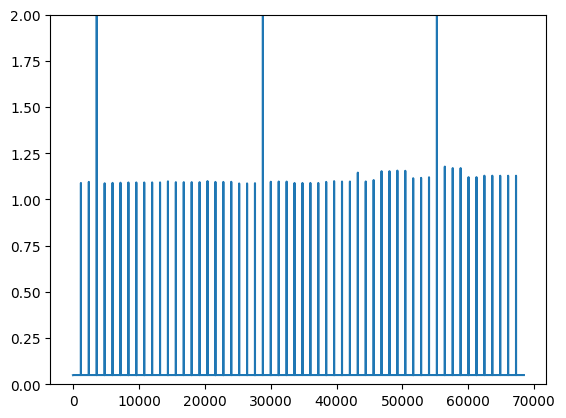

In [23]:
rs = []
recordings_new_id = []
for a in range(len(recordings) - 1):
    x = recordings[a]
    y = recordings[a + 1]
    r = y[0] - x[0]
    # print(r)
    rs.append(r)

    if r > 2:
        print(f'Id of new recordings: {a}')
        recordings_new_id.append(a)

plt.plot(rs)
ax = plt.gca()
ax.set_ylim([0, 2])
plt.show()

## 1.3 Odstępy pomiędzy podzielonymi próbkami
Podczas tworzenia nowego pliku można zauważyć duży odstęp

[3601, 28822, 55238]


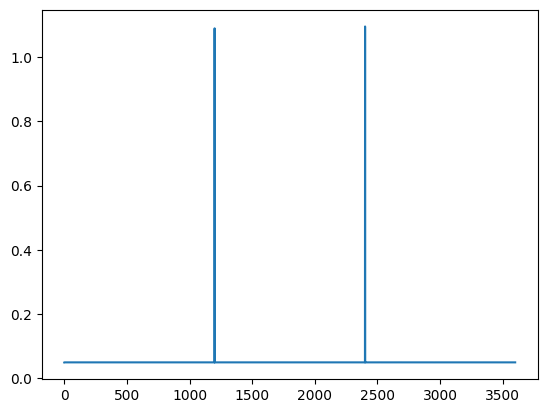

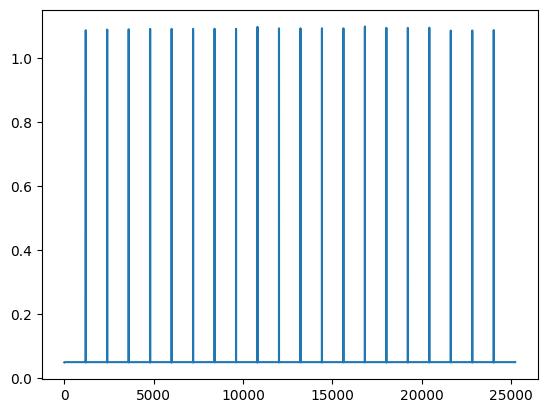

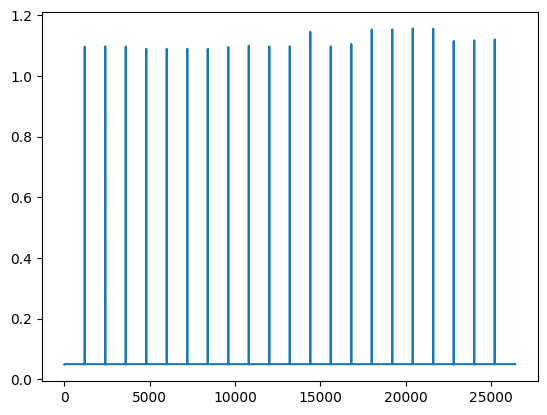

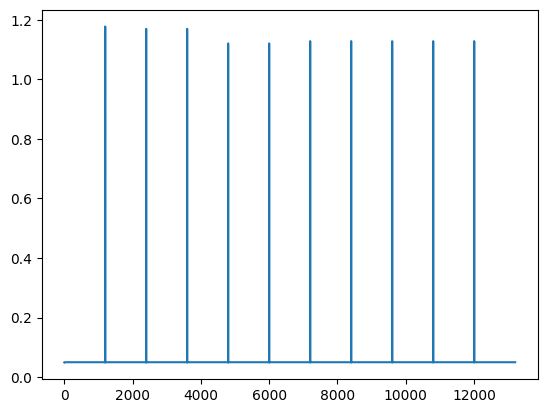

In [25]:
print(recordings_new_id)
recordings_divided = [
    recordings[:recordings_new_id[0]],
    recordings[recordings_new_id[0] + 1: recordings_new_id[1]],
    recordings[recordings_new_id[1] + 1: recordings_new_id[2]],
    recordings[recordings_new_id[2] + 1:]
]

for recording_divided in recordings_divided:
    rs = []
    for a in range(len(recording_divided) - 1):
        x = recording_divided[a]
        y = recording_divided[a + 1]
        r = y[0] - x[0]
        rs.append(r)
    plt.plot(rs)
    plt.show()



## 1.4 Dodanie czasu względnego zamiast bezwzględnego

Dodatkowo zmiena jednostki do czasu fps w video

In [26]:
def round_to_multiple(number, multiple):
    return round(multiple * round(number / multiple), 2)


fps = 25
separation = 1 / 25

In [27]:
recordings_relative_divided = []
for recordings in recordings_divided:
    relative_times = set()  #Czasy nie powinny się powtarzać
    recordings_relative = []
    for i in range(len(recordings)):
        if i == 0:
            recordings_relative.append([0, recordings[i][1], recordings[i][2]])
            continue
        x = recordings[0]
        y = recordings[i]
        relative_time = y[0] - x[0]
        relative_time = round_to_multiple(relative_time, separation)
        # Jak czas się powtarza to jest pomijany
        if relative_time in relative_times:
            continue

        relative_times.add(relative_time)
        recordings_relative.append([relative_time, recordings[i][1], recordings[i][2]])
    recordings_relative_divided.append(recordings_relative)
print(recordings_relative_divided[0][:10])

[[0, 492381, 3], [0.04, 492431, 3], [0.08, 492481, 3], [0.16, 492531, 3], [0.2, 492581, 3], [0.24, 492631, 3], [0.28, 492681, 3], [0.36, 492731, 3], [0.4, 492781, 3], [0.44, 492831, 3]]


# 2. Nagrania video

In [28]:
video_list_files = os.listdir('videos')
print(video_list_files)

['GOPR1082.MP4', 'GOPR1085.MP4', 'GOPR1087.MP4', 'GOPR1088.MP4']


## 2.1 Zbadanie średniej jasności pikseli

In [29]:
frames_light_times = []
for video_name in video_list_files:
    video_path = os.path.join('videos', video_name)
    cap = cv2.VideoCapture(video_path)
    frames_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = cap.get(cv2.CAP_PROP_FPS)
    video_time = frames_count / fps
    frames_light_time = []

    if (cap.isOpened() == False):
        print("Error opening video stream or file")

    pbar = tqdm(total=frames_count)
    succ = fail = 0
    while (cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            fail += 1
            continue
        else:
            succ += 1
        if succ == frames_count:
            break

        # cv2.imshow('Frame',frame)
        frame_light = round(np.average(frame) / 256, 2)
        frame_time = round(succ / fps, 2)
        frames_light_time.append([frame_light, frame_time])

        pbar.update(1)
        # if cv2.waitKey(25) & 0xFF == ord('q'):
        #     break

    # print(succ, fail)
    cap.release()
    cv2.destroyAllWindows()
    frames_light_times.append(frames_light_time)

100%|█████████▉| 17231/17250.0 [01:27<00:00, 206.57it/s]
100%|█████████▉| 17249/17250.0 [01:27<00:00, 197.93it/s]

  0%|          | 6/33585.0 [00:00<09:36, 58.25it/s]
  0%|          | 12/33585.0 [00:00<25:34, 21.88it/s]
  0%|          | 31/33585.0 [00:00<09:11, 60.83it/s]
  0%|          | 50/33585.0 [00:00<06:01, 92.71it/s]
  0%|          | 71/33585.0 [00:00<04:34, 122.19it/s]
  0%|          | 91/33585.0 [00:00<03:56, 141.82it/s]
  0%|          | 112/33585.0 [00:01<03:30, 159.03it/s]
  0%|          | 134/33585.0 [00:01<03:09, 176.16it/s]
  0%|          | 157/33585.0 [00:01<02:55, 190.23it/s]
  1%|          | 181/33585.0 [00:01<02:43, 203.78it/s]
  1%|          | 203/33585.0 [00:01<02:40, 208.14it/s]
  1%|          | 225/33585.0 [00:01<02:39, 209.26it/s]
  1%|          | 247/33585.0 [00:01<02:43, 204.24it/s]
  1%|          | 268/33585.0 [00:01<02:44, 202.84it/s]
  1%|          | 290/33585.0 [00:01<02:40, 206.93it/s]
  1%|          | 314/33585.0 [00:01<02:34, 215.62it/s]
  1%|          |

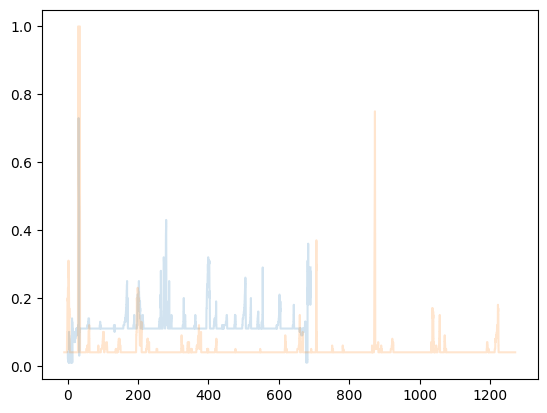

In [69]:
light_y = [x[0] for x in frames_light_times[0]]
light_x = [x[1] for x in frames_light_times[0]]

recordings_moved = [[x[0] - 10, x[1], x[2]] for x in recordings_relative_divided[1]]
record_y = [x[2] / 100 if x[2] < 100 else 1 for x in recordings_moved]
record_x = [x[0] for x in recordings_moved]


plt.plot(light_x, light_y, alpha=.2)
plt.plot(record_x, record_y, alpha=.2)
plt.show()

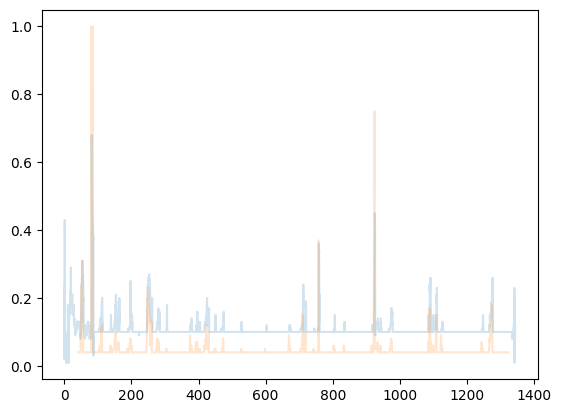

In [70]:
light_y = [x[0] for x in frames_light_times[1]]
light_x = [x[1] for x in frames_light_times[1]]

recordings_moved = [[x[0] + 41, x[1], x[2]] for x in recordings_relative_divided[1]]
record_y = [x[2] / 100 if x[2] < 100 else 1 for x in recordings_moved]
record_x = [x[0] for x in recordings_moved]

plt.plot(light_x, light_y, alpha=.2)
plt.plot(record_x, record_y, alpha=.2)
plt.show()

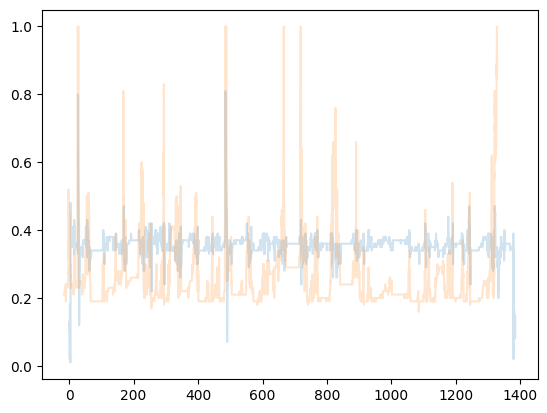

In [71]:
light_y = [x[0] for x in frames_light_times[2]]
light_x = [x[1] for x in frames_light_times[2]]

recordings_moved = [[x[0] - 15, x[1], x[2]] for x in recordings_relative_divided[2]]
ys = record_y = [x[2] for x in recordings_moved]
record_y = [x[2] / 100 if x[2] < 100 else 1 for x in recordings_moved]
record_x = [x[0] for x in recordings_moved]

plt.plot(light_x, light_y, alpha=.2)
plt.plot(record_x, record_y, alpha=.2)
plt.show()

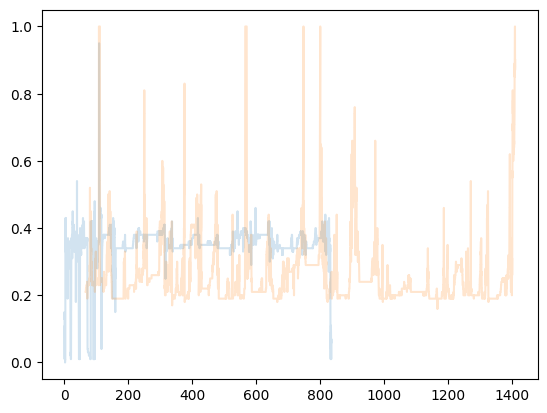

In [76]:
light_y = [x[0] for x in frames_light_times[3]]
light_x = [x[1] for x in frames_light_times[3]]

recordings_moved = [[x[0] + 67, x[1], x[2]] for x in recordings_relative_divided[2]]
ys = record_y = [x[2] for x in recordings_moved]
record_y = [x[2] / 100 if x[2] < 100 else 1 for x in recordings_moved]
record_x = [x[0] for x in recordings_moved]

plt.plot(light_x, light_y, alpha=.2)
plt.plot(record_x, record_y, alpha=.2)
plt.show()

## 2.2 Przesunięcie recordings o daną wartość

In [77]:
move_recording_values = [-10, -41, -15, 67]

In [78]:
recordings_moved_all = []
outlier_value = 100
for recordings, move_value in zip(recordings_relative_divided, move_recording_values):
    recordings_moved = []
    for x in recordings:
        new_x2 = x[2] / outlier_value if x[2] < outlier_value else 1
        new_x0 = x[0] + move_value
        recordings_moved.append([new_x0, x[1], new_x2])

    recordings_moved_all.append(recordings_moved)

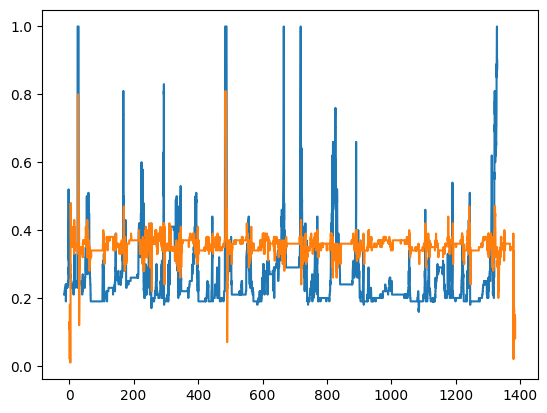

In [79]:
n = 2
light_y = [x[0] for x in frames_light_times[n]]
light_x = [x[1] for x in frames_light_times[n]]

record_y = [x[2] for x in recordings_moved_all[n]]
record_x = [x[0] for x in recordings_moved_all[n]]

plt.plot(record_x, record_y)
plt.plot(light_x, light_y)
plt.show()

## 2.3 Obcięcie nagrań (do tej samej długości)

In [80]:
data = []
for i in range(len(recordings_moved_all)):
    d = []
    for r in tqdm(recordings_moved_all[i]):
        for frame_id, f in enumerate(frames_light_times[i]):
            if r[0] == f[1]:
                # d.append([frame_id, r[0], r[2], f[0]])
                d.append([frame_id, r[2], ])
                continue
    data.append(d)

print(data[0][:10])


100%|██████████| 13208/13208 [00:30<00:00, 427.10it/s]

[[24, 0.03], [26, 0.03], [49, 0.03], [51, 0.03], [53, 0.03], [55, 0.03], [68, 0.03], [70, 0.03], [74, 0.03], [76, 0.03]]


In [81]:
for x in data[0][500:600]:
    print(x)
print(len(data[0]))

[984, 0.03]
[985, 0.03]
[986, 0.03]
[988, 0.03]
[989, 0.03]
[990, 0.03]
[991, 0.03]
[993, 0.03]
[994, 0.03]
[995, 0.03]
[996, 0.03]
[998, 0.03]
[999, 0.03]
[1000, 0.03]
[1001, 0.03]
[1003, 0.03]
[1004, 0.03]
[1005, 0.03]
[1006, 0.03]
[1008, 0.03]
[1009, 0.03]
[1010, 0.03]
[1011, 0.03]
[1013, 0.03]
[1014, 0.03]
[1015, 0.03]
[1016, 0.03]
[1018, 0.03]
[1019, 0.03]
[1020, 0.03]
[1021, 0.03]
[1023, 0.03]
[1024, 0.03]
[1025, 0.03]
[1026, 0.03]
[1028, 0.03]
[1029, 0.03]
[1030, 0.03]
[1031, 0.03]
[1033, 0.03]
[1034, 0.03]
[1035, 0.03]
[1036, 0.03]
[1038, 0.03]
[1039, 0.03]
[1040, 0.03]
[1041, 0.03]
[1043, 0.03]
[1044, 0.03]
[1045, 0.03]
[1046, 0.03]
[1048, 0.03]
[1049, 0.03]
[1050, 0.03]
[1051, 0.03]
[1053, 0.03]
[1054, 0.03]
[1055, 0.03]
[1056, 0.03]
[1058, 0.03]
[1059, 0.03]
[1060, 0.03]
[1061, 0.03]
[1063, 0.03]
[1064, 0.03]
[1065, 0.03]
[1066, 0.03]
[1068, 0.03]
[1069, 0.03]
[1070, 0.03]
[1071, 0.03]
[1073, 0.03]
[1074, 0.03]
[1075, 0.03]
[1076, 0.03]
[1078, 0.03]
[1079, 0.03]
[1080, 0.03]

# 3. Normalizacja

## 3.1 Połączenie w jedną tablicę

In [82]:
data_one = []
for i, x in enumerate(data):
    for y in x:
        data_one.append([f'{i}_{y[0]}', y[1]])

## 3.2 Usunięcie wartości odstających

In [83]:
data = []
for id_, value in data_one:
    if value >= 0.8:
        pass
    elif value == 0:
        print(id_, value)
    else:
        data.append([id_, value])


0.78


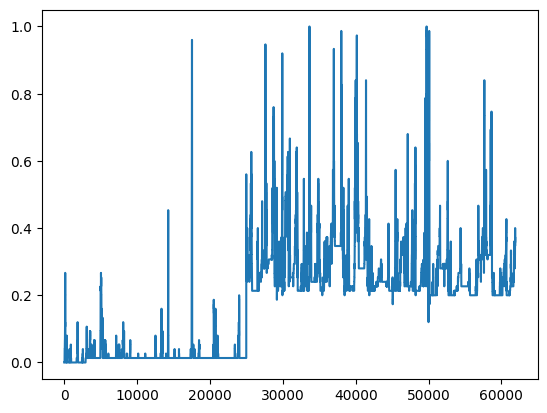

In [84]:
data_np_y = np.array([x[1] for x in data])
# data_np = np.array(data, dtype=object)
std_y = np.std(data_np_y)
min_y = np.min(data_np_y)
max_y = np.max(data_np_y)
print(max_y)

data_normalized_min_max = []
for id_, value in data:
    new_value = (value - min_y) / (max_y - min_y)
    data_normalized_min_max.append([id_, new_value])

plt.plot([b for a, b in data_normalized_min_max])
plt.show()

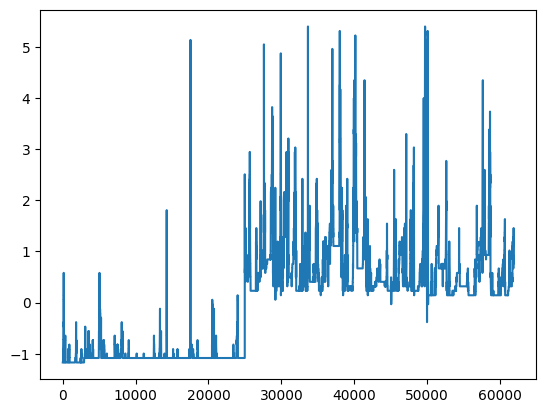

In [85]:
data_np_y = np.array([x[1] for x in data])

std_y = np.std(data_np_y)
mean = np.mean(data_np_y)

data_normalized_z_score = []
for id_, value in data:
    new_value = (value - mean) / std_y
    data_normalized_z_score.append([id_, new_value])

plt.plot([b for a, b in data_normalized_z_score])
plt.show()

# 4. Zapisanie danych

In [86]:
import csv

f = open(f"z_score.csv", 'w', newline='', encoding='utf-8')
writer = csv.writer(f)
writer.writerows(data_normalized_z_score)
f.close()

In [87]:
f = open(f"min_max.csv", 'w', newline='', encoding='utf-8')
writer = csv.writer(f)
writer.writerows(data_normalized_min_max)
f.close()